Day 30 - The Final Map

This map showcases Flushing, NYC, which is Emma's hometown! Highlighting its streets and parks, the streets are color-coded by type, emphasizing the diverse urban layout, while parks are depicted in a contrasting color to show the area’s green spaces. The basemap provides additional geographic context with minimal distractions.

Design Considerations

1. Color Scheme:
- Pink background: Adds a playful and personalized touch, aligning with the theme of the map.
Road colors: Each road type is assigned a distinct color (e.g., crimson for motorways, medium orchid for residential streets) for clear differentiation.
- Parks in olive: Chosen for contrast against the pink background and to naturally represent greenery.

2. Typography:
- Cursive font (“Brush Script MT”): Adds an elegant, handwritten feel to the text, enhancing the map’s personal and whimsical theme.
- Title fonts and sizes vary to prioritize key elements like the title, location name, and credits.

3. Basemap:
- The CartoDB Positron basemap provides a clean, light-colored background that doesn’t overpower the thematic design.

4. Annotations:
- Titles like “Emma’s Hometown!<3” and “Flushing, NYC” are placed prominently with adjusted positions for balance and emphasis.

5. Legend-Free Design:
- Instead of a legend, intuitive color coding allows the viewer to distinguish between road types and parks visually.

This map was designed to be both visually engaging and informative while reflecting a personalized and vibrant aesthetic, plus its fun to map your friends favorite places! 

/var/folders/41/93fvfx5910ldvs4p20rv5w540000gn/T/ipykernel_7316/3039048946.py:20: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  highways = ox.geometries.geometries_from_bbox(
/Users/macytrout/miniforge3/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/macytrout/miniforge3/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/macytrout/miniforge3/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/

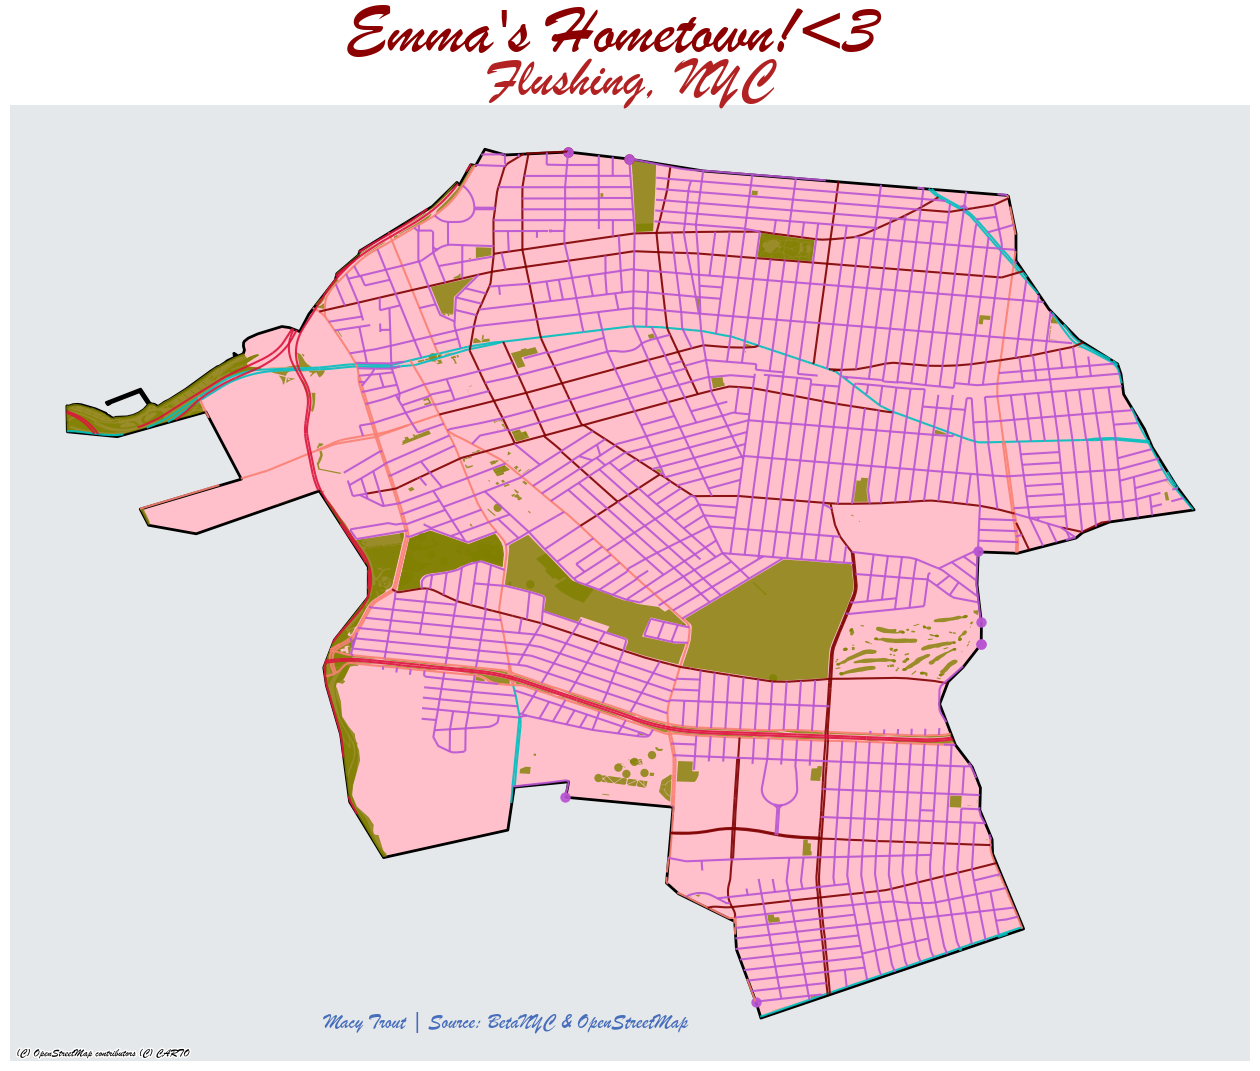

In [28]:
import osmnx as ox
import tempfile
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import contextily as ctx

temp_cache_dir = tempfile.mkdtemp()
ox.settings.cache_folder = temp_cache_dir
ox.settings.use_cache = True

rcParams["font.family"] = "Brush Script MT"

flushing_path = "/Users/macytrout/Desktop/NYC_Neighborhoods_BetaNYC.geojson"
neighborhoods = gpd.read_file(flushing_path)
flushing = neighborhoods[neighborhoods["neighborhood"] == "Flushing"]

bbox = flushing.total_bounds

highways = ox.geometries.geometries_from_bbox(
    north=bbox[3], south=bbox[1], east=bbox[2], west=bbox[0],
    tags={"highway": ["primary", "secondary", "tertiary", "motorway", "residential", "road"]}
)

parks = ox.geometries.geometries_from_bbox(
    north=bbox[3], south=bbox[1], east=bbox[2], west=bbox[0],
    tags={"leisure": ["garden", "park"], "landuse": ["grass", "recreation_ground"]}
)

streets_clipped = highways.clip(flushing)
parks_clipped = parks.clip(flushing)

streets_clipped = streets_clipped[streets_clipped.is_valid & ~streets_clipped.is_empty]
parks_clipped = parks_clipped[parks_clipped.is_valid & ~parks_clipped.is_empty]

road_colors = {
    "primary": "c",
    "secondary": "salmon",
    "tertiary": "maroon",
    "motorway": "crimson",
    "residential": "mediumorchid",
    "road": "hotpink",
}

fig, ax = plt.subplots(figsize=(16, 18))
ax.set_facecolor("pink")

flushing.plot(ax=ax, color="pink", edgecolor="black", linewidth=2)

parks_clipped.plot(ax=ax, color="olive", edgecolor="none", alpha=0.8)

for road_type, color in road_colors.items():
    subset = streets_clipped[streets_clipped["highway"] == road_type]
    if not subset.empty:
        subset.plot(ax=ax, color=color, linewidth=1.5, alpha=0.9, label=road_type)

ax.text(0.27, 1.1, "Emma's Hometown!<3", fontsize=50, fontweight="bold", color="darkred",
        transform=ax.transAxes, ha="left", va="top")

ax.text(0.4, 0.03, "Macy Trout | Source: BetaNYC & OpenStreetMap",
        fontsize=15, fontweight="bold", color="#476ebc",
        transform=ax.transAxes, ha="center", va="bottom")

ax.text(0.5, 1.05, "Flushing, NYC", fontsize=40, fontweight="bold", color="firebrick",
        transform=ax.transAxes, ha="center", va="top")

ax.axis("off")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14, alpha=0.6)

plt.show()